# import requier libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Data gathering

In [2]:
data = pd.read_csv('heart.csv')
data.head() # will print  5 top and head rows 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

we get 165 targeted people of heart attack

# Data prepration 

In [3]:
data.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

In [5]:
data[(data['sex'] == 0) & (data['target'] == 1)].count

<bound method DataFrame.count of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2     41    0   1       130   204    0        0      172      0      1.4   
4     57    0   0       120   354    0        1      163      1      0.6   
6     56    0   1       140   294    0        0      153      0      1.3   
11    48    0   2       130   275    0        1      139      0      0.2   
14    58    0   3       150   283    1        0      162      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
151   71    0   0       112   149    0        1      125      0      1.6   
153   66    0   2       146   278    0        0      152      0      0.0   
154   39    0   2       138   220    0        1      152      0      0.0   
155   58    0   0       130   197    0        1      131      0      0.6   
161   55    0   1       132   342    0        1      166      0      1.2   

     slope  ca  thal  target  
2        2   0     2   

<AxesSubplot: xlabel='target', ylabel='count'>

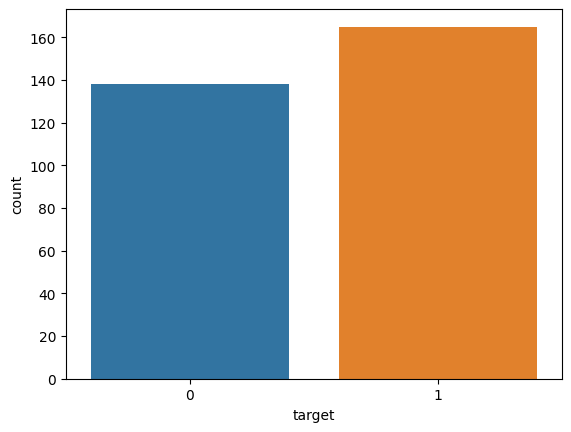

In [6]:
sns.countplot(data=data , x='target')

<AxesSubplot: xlabel='sex', ylabel='count'>

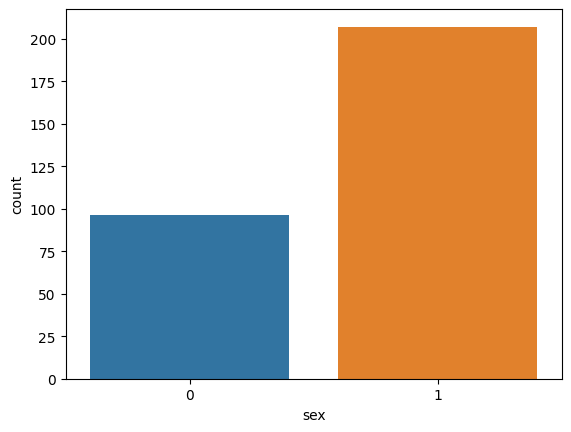

In [9]:
sns.countplot(data=data , x ='sex')

<AxesSubplot: >

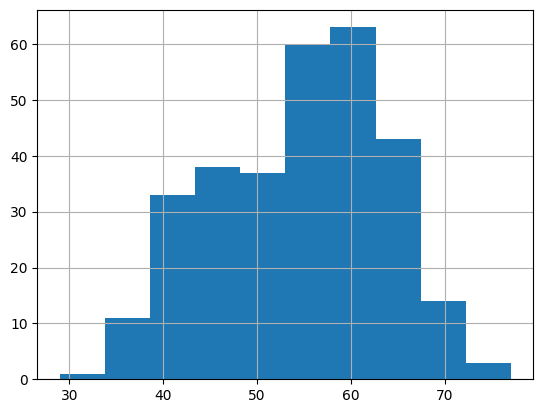

In [10]:
data['age'].hist()

In [11]:
x = data.iloc[:,:-1].values
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [12]:
y = data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
np.shape(x)

(303, 13)

# Model tarining

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=150)

In [26]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier()

# Testing the model

In [27]:
from sklearn import metrics

In [28]:
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.44      0.52        36
           1       0.60      0.75      0.67        40

    accuracy                           0.61        76
   macro avg       0.61      0.60      0.59        76
weighted avg       0.61      0.61      0.60        76



In [30]:
#clf = KNeighborsClassifier(n_neighbors=7)
#clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#print(metrics.classification_report(y_test, y_pred))

In [31]:
from sklearn.svm import SVC

In [32]:
clf = SVC(C=15, kernel='linear', random_state=3244)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        36
           1       0.83      0.88      0.85        40

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

